Set Up

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [37]:
df = pd.read_csv("../Resources/winequality-white.csv", delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [12]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

# See the first five rows of the dataset
df.head()

Rows, columns: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
# Missing Values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
fig = px.histogram(df,x='quality')
fig.show()

<AxesSubplot:>

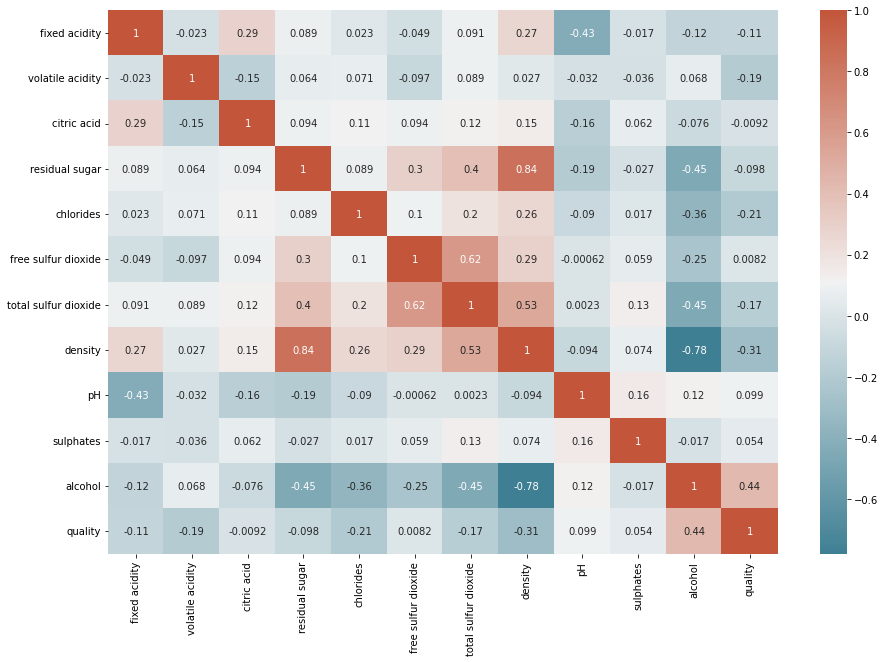

In [14]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [38]:
# Create Classification version of target variable
df['goodquality'] = [2 if x >= 7 else 1 if x==6 else 0 for x in df['quality']]

In [39]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

1    2198
0    1640
2    1060
Name: goodquality, dtype: int64

<AxesSubplot:>

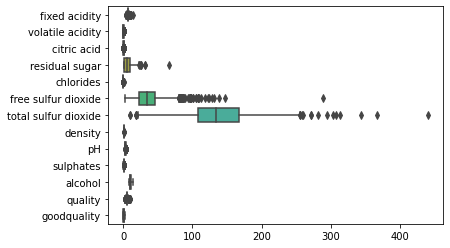

In [34]:
sns.boxplot(data=df, orient='h')

Based on the plot there are outliers in the two sulfur oxide categories and one or so in the residual sugar

In [40]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

clean_df = remove_outlier(df, 'free sulfur dioxide')
clean_df = remove_outlier(clean_df, 'total sulfur dioxide')
clean_df = remove_outlier(clean_df, 'residual sugar')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4822 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4822 non-null   float64
 1   volatile acidity      4822 non-null   float64
 2   citric acid           4822 non-null   float64
 3   residual sugar        4822 non-null   float64
 4   chlorides             4822 non-null   float64
 5   free sulfur dioxide   4822 non-null   float64
 6   total sulfur dioxide  4822 non-null   float64
 7   density               4822 non-null   float64
 8   pH                    4822 non-null   float64
 9   sulphates             4822 non-null   float64
 10  alcohol               4822 non-null   float64
 11  quality               4822 non-null   int64  
 12  goodquality           4822 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 527.4 KB


In [36]:
# See proportion of good vs bad wines
clean_df['goodquality'].value_counts()

1    2169
0    1603
2    1050
Name: goodquality, dtype: int64

In [41]:
# Separate feature variables and target variable
X = clean_df.drop(['quality','goodquality'], axis = 1)
y = clean_df['goodquality']

In [42]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [43]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

# Modeling

## Decision Tree

In [44]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       400
           1       0.62      0.65      0.63       541
           2       0.63      0.60      0.62       265

    accuracy                           0.63      1206
   macro avg       0.64      0.63      0.63      1206
weighted avg       0.63      0.63      0.63      1206



## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet

model6 = LogisticRegression(solver='liblinear', random_state=1).fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61       400
           1       0.52      0.69      0.59       541
           2       0.65      0.28      0.39       265

    accuracy                           0.56      1206
   macro avg       0.60      0.52      0.53      1206
weighted avg       0.58      0.56      0.55      1206



## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       400
           1       0.65      0.74      0.69       541
           2       0.79      0.61      0.69       265

    accuracy                           0.70      1206
   macro avg       0.72      0.68      0.70      1206
weighted avg       0.70      0.70      0.70      1206



In [47]:
from sklearn.ensemble import RandomForestClassifier
model2_2 = RandomForestClassifier(n_estimators=1000,random_state=1)
model2_2.fit(X_train, y_train)
y_pred2_2 = model2_2.predict(X_test)
print(classification_report(y_test, y_pred2_2))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       400
           1       0.66      0.76      0.71       541
           2       0.80      0.60      0.69       265

    accuracy                           0.71      1206
   macro avg       0.73      0.69      0.70      1206
weighted avg       0.72      0.71      0.71      1206



Increase in estimators did not improve score

## ADA Boost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       400
           1       0.53      0.57      0.55       541
           2       0.56      0.46      0.51       265

    accuracy                           0.56      1206
   macro avg       0.57      0.55      0.56      1206
weighted avg       0.56      0.56      0.56      1206



## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       400
           1       0.58      0.69      0.63       541
           2       0.69      0.51      0.58       265

    accuracy                           0.62      1206
   macro avg       0.64      0.60      0.62      1206
weighted avg       0.63      0.62      0.62      1206



## XGBoost

In [50]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1,use_label_encoder=False)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

[01:20:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       400
           1       0.67      0.72      0.70       541
           2       0.73      0.62      0.67       265

    accuracy                           0.70      1206
   macro avg       0.71      0.69      0.70      1206
weighted avg       0.70      0.70      0.70      1206



## Extra Tree Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model6 = ExtraTreesClassifier(random_state=1)
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       400
           1       0.65      0.75      0.70       541
           2       0.77      0.58      0.66       265

    accuracy                           0.70      1206
   macro avg       0.72      0.68      0.70      1206
weighted avg       0.71      0.70      0.70      1206



In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model6_6 = ExtraTreesClassifier(n_estimators=1000,random_state=1)
model6_6.fit(X_train, y_train)
y_pred6_6 = model6_6.predict(X_test)
print(classification_report(y_test, y_pred6_6))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       400
           1       0.65      0.76      0.70       541
           2       0.78      0.58      0.67       265

    accuracy                           0.70      1206
   macro avg       0.73      0.68      0.70      1206
weighted avg       0.71      0.70      0.70      1206



Feature Importance

Random Forest

<AxesSubplot:>

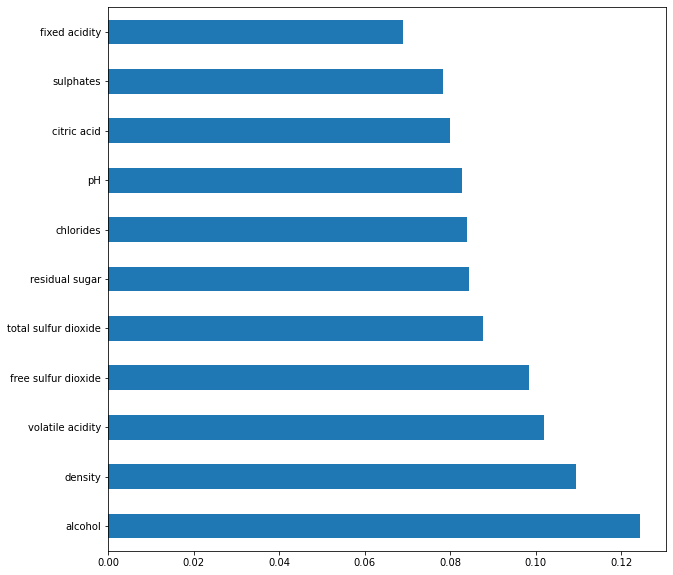

In [26]:
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

XGBoost

<AxesSubplot:>

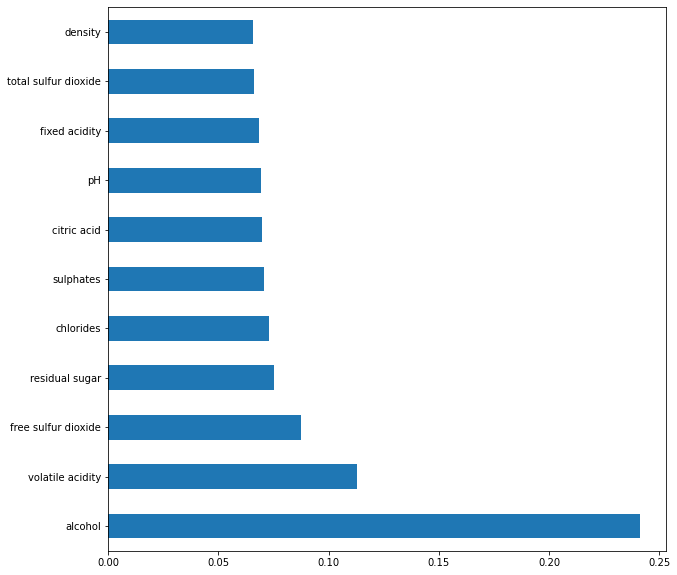

In [27]:
feat_importances = pd.Series(model5.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

Comparing Top 4 Features

In [28]:
# Filtering df for only good quality
df_temp = df[df['goodquality']==1]
df_temp.describe()

# Filtering df for only bad quality
df_temp2 = df[df['goodquality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.0
mean,6.961524,0.310265,0.334311,7.054451,0.051436,35.338720,148.597866,0.995160,3.170457,0.481506,9.849530,4.876220,0.0
std,0.884887,0.112548,0.142987,5.283594,0.026743,20.217828,46.914579,0.002556,0.144274,0.100566,0.876269,0.364596,0.0
min,4.200000,0.100000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987220,2.790000,0.250000,8.000000,3.000000,0.0
25%,6.400000,0.240000,0.240000,1.700000,0.040000,20.000000,117.000000,0.993200,3.080000,0.410000,9.200000,5.000000,0.0
50%,6.800000,0.290000,0.320000,6.625000,0.047000,34.000000,149.000000,0.995140,3.160000,0.470000,9.600000,5.000000,0.0
75%,7.500000,0.350000,0.410000,11.025000,0.053000,49.000000,182.000000,0.997100,3.240000,0.530000,10.400000,5.000000,0.0
max,11.800000,1.100000,1.000000,23.500000,0.346000,289.000000,440.000000,1.002410,3.790000,0.880000,13.600000,5.000000,0.0
